In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import StandardScaler

In [88]:
df = pd.read_csv('/content/annual_generation_state.csv')
df.head()

,YEAR,STATE,TYPE OF PRODUCER,ENERGY SOURCE,GENERATION (Megawatthours)
0,1990,AK,Total Electric Power Industry,Total,"5,599,506"
1,1990,AK,Total Electric Power Industry,Coal,"510,573"
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,"974,521"
3,1990,AK,Total Electric Power Industry,Natural Gas,"3,466,261"
4,1990,AK,Total Electric Power Industry,Petroleum,"497,116"


In [89]:
df.rename(columns={
    "YEAR": "year",
    "STATE": "state",
    "TYPE OF PRODUCER": "producer_type",
    "ENERGY SOURCE": "energy_source",
    "GENERATION (Megawatthours)": "generation"
}, inplace=True)

In [90]:
df.head()

,year,state,producer_type,energy_source,generation
0,1990,AK,Total Electric Power Industry,Total,"5,599,506"
1,1990,AK,Total Electric Power Industry,Coal,"510,573"
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,"974,521"
3,1990,AK,Total Electric Power Industry,Natural Gas,"3,466,261"
4,1990,AK,Total Electric Power Industry,Petroleum,"497,116"


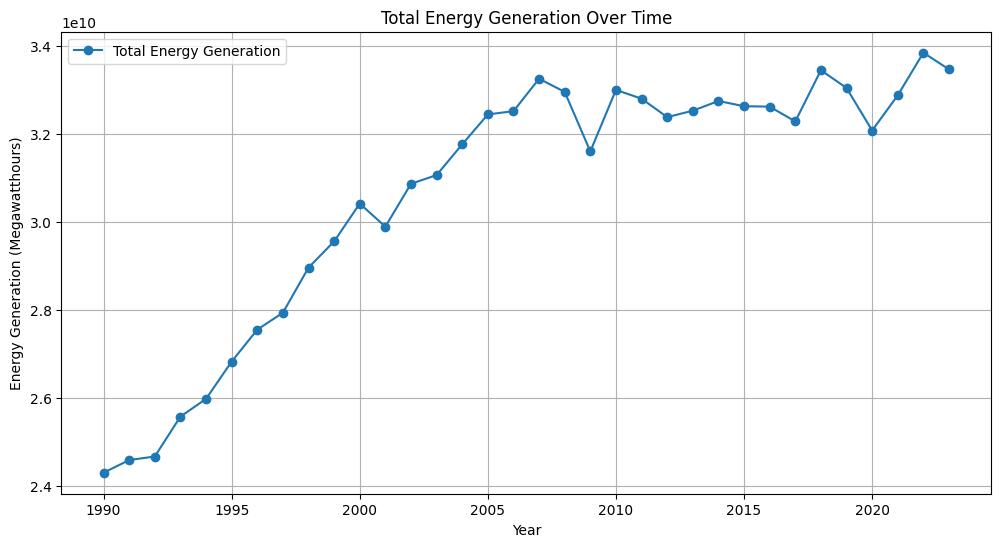

In [91]:
df['generation'] = df['generation'].replace({',': ''}, regex=True).astype(float)
energy_trend = df.groupby('year')['generation'].sum()


plt.figure(figsize=(12, 6))
plt.plot(energy_trend.index, energy_trend.values, marker='o', linestyle='-', label="Total Energy Generation")
plt.xlabel("Year")
plt.ylabel("Energy Generation (Megawatthours)")
plt.title("Total Energy Generation Over Time")
plt.legend()
plt.grid(True)
plt.show()

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62282 entries, 0 to 62281
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           62282 non-null  int64  
 1   state          62282 non-null  object 
 2   producer_type  62282 non-null  object 
 3   energy_source  62282 non-null  object 
 4   generation     62282 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.4+ MB


In [93]:
df['generation'] = df['generation'].astype(int)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62282 entries, 0 to 62281
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   year           62282 non-null  int64 
 1   state          62282 non-null  object
 2   producer_type  62282 non-null  object
 3   energy_source  62282 non-null  object
 4   generation     62282 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 2.4+ MB


In [95]:
unique_states = df['state'].unique()
print(unique_states)

['AK' 'AL' 'AR' 'AZ' 'CA' 'CO' 'CT' 'DC' 'DE' 'FL' 'GA' 'HI' 'IA' 'ID'
 'IL' 'IN' 'KS' 'KY' 'LA' 'MA' 'MD' 'ME' 'MI' 'MN' 'MO' 'MS' 'MT' 'NC'
 'ND' 'NE' 'NH' 'NJ' 'NM' 'NV' 'NY' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD'
 'TN' 'TX' 'US-TOTAL' 'UT' 'VA' 'VT' 'WA' 'WI' 'WV' 'WY' '  ' 'US-Total']


In [96]:
df = df[~df['state'].isin(['US-Total', 'US-TOTAL', '  '])]
df['state'].unique()

array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
       'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
       'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'], dtype=object)

In [97]:
missing_values = df.isnull().sum()
print(missing_values)

year             0
state            0
producer_type    0
energy_source    0
generation       0
dtype: int64


In [98]:
df.head()

,year,state,producer_type,energy_source,generation
0,1990,AK,Total Electric Power Industry,Total,5599506
1,1990,AK,Total Electric Power Industry,Coal,510573
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521
3,1990,AK,Total Electric Power Industry,Natural Gas,3466261
4,1990,AK,Total Electric Power Industry,Petroleum,497116


In [99]:
 df = df.sort_values(by=["year", "state", "energy_source"])
 df["lag_1"] = df.groupby(["state", "energy_source"])["generation"].shift(1)
 df["lag_2"] = df.groupby(["state", "energy_source"])["generation"].shift(2)
 df["lag_3"] = df.groupby(["state", "energy_source"])["generation"].shift(3)

In [100]:
df.head()

,year,state,producer_type,energy_source,generation,lag_1,lag_2,lag_3
1,1990,AK,Total Electric Power Industry,Coal,510573,NaN,NaN,NaN
8,1990,AK,"Electric Generators, Electric Utilities",Coal,311960,510573.0,NaN,NaN
18,1990,AK,"Combined Heat and Power, Commercial Power",Coal,198613,311960.0,510573.0,NaN
2,1990,AK,Total Electric Power Industry,Hydroelectric Conventional,974521,NaN,NaN,NaN
9,1990,AK,"Electric Generators, Electric Utilities",Hydroelectric Conventional,974521,974521.0,NaN,NaN


In [101]:
energy_mapping = {
    'Natural Gas': 'Natural Gas',
    'Coal': 'Other Fossil',
    'Petroleum': 'Other Fossil',
    'Other Gases': 'Other Fossil',
    'Nuclear': 'Nuclear and Renewable',
    'Hydroelectric Conventional': 'Nuclear and Renewable',
    'Solar': 'Nuclear and Renewable',
    'Wind': 'Nuclear and Renewable',
    'Wood': 'Nuclear and Renewable',
    'Geothermal': 'Nuclear and Renewable',
    'Other Biomass': 'Nuclear and Renewable',
    'Pumped Storage': 'Nuclear and Renewable',
    'Other': 'Other Fossil'
}

df['energy_category'] = df['energy_source'].map(energy_mapping)

print(df[['energy_source', 'energy_category']].drop_duplicates())

                      energy_source        energy_category
1                              Coal           Other Fossil
2        Hydroelectric Conventional  Nuclear and Renewable
3                       Natural Gas            Natural Gas
4                         Petroleum           Other Fossil
0                             Total                    NaN
5                              Wind  Nuclear and Renewable
6       Wood and Wood Derived Fuels                    NaN
24                          Nuclear  Nuclear and Renewable
25                    Other Biomass  Nuclear and Renewable
26                      Other Gases           Other Fossil
56                   Pumped Storage  Nuclear and Renewable
100                      Geothermal  Nuclear and Renewable
104                           Other           Other Fossil
109  Solar Thermal and Photovoltaic                    NaN


In [102]:
df = df[df['energy_source'] != 'Total']

In [103]:
energy_mapping.update({
    'Wood and Wood Derived Fuels': 'Nuclear and Renewable',
    'Solar Thermal and Photovoltaic': 'Nuclear and Renewable'
})

In [104]:
df['energy_category'] = df['energy_source'].map(energy_mapping)

In [105]:
print(df[['energy_source', 'energy_category']])

                        energy_source        energy_category
1                                Coal           Other Fossil
8                                Coal           Other Fossil
18                               Coal           Other Fossil
2          Hydroelectric Conventional  Nuclear and Renewable
9          Hydroelectric Conventional  Nuclear and Renewable
...                               ...                    ...
62262  Solar Thermal and Photovoltaic  Nuclear and Renewable
62274  Solar Thermal and Photovoltaic  Nuclear and Renewable
62263                            Wind  Nuclear and Renewable
62275                            Wind  Nuclear and Renewable
62281                            Wind  Nuclear and Renewable

[50644 rows x 2 columns]


In [106]:
missing_categories = df['energy_category'].isna()
print("Remaining missing values in energy_category:\n", missing_categories)

Remaining missing values in energy_category:
 1        False
8        False
18       False
2        False
9        False
         ...  
62262    False
62274    False
62263    False
62275    False
62281    False
Name: energy_category, Length: 50644, dtype: bool


In [107]:
missing_generation = df['generation'].isna().sum()
print(f"Missing values in 'generation': {missing_generation}")

Missing values in 'generation': 0


In [108]:
df['generation'] = df['generation'].fillna(1e-6)

In [109]:
df['generation'] = df['generation'].replace({',': ''}, regex=True).astype(float)

In [110]:
def clr_transformation(series, eps=1e-6):
    series = series.copy()
    series[series <= 0] = eps

    if series.nunique() == 1:
        return np.zeros_like(series)

    geometric_mean = np.exp(np.mean(np.log(series)))
    return np.log(series / geometric_mean)

df['clr_generation'] = df.groupby(['state', 'year'])['generation'].transform(clr_transformation)
print(df[['state', 'year', 'generation', 'clr_generation']].head())

   state  year  generation  clr_generation
1     AK  1990    510573.0        3.554655
8     AK  1990    311960.0        3.061997
18    AK  1990    198613.0        2.610480
2     AK  1990    974521.0        4.201068
9     AK  1990    974521.0        4.201068


In [111]:
extreme_neg_values = df[df['clr_generation'] < -10]
print(f"Extreme negative values count: {len(extreme_neg_values)}")

Extreme negative values count: 3889


In [112]:
df = df[df['clr_generation'] > -10]

In [113]:
df_pivot = df.pivot_table(
    index=['state', 'year'],
    columns='energy_category',
    values='clr_generation',
    aggfunc='sum'
).reset_index()

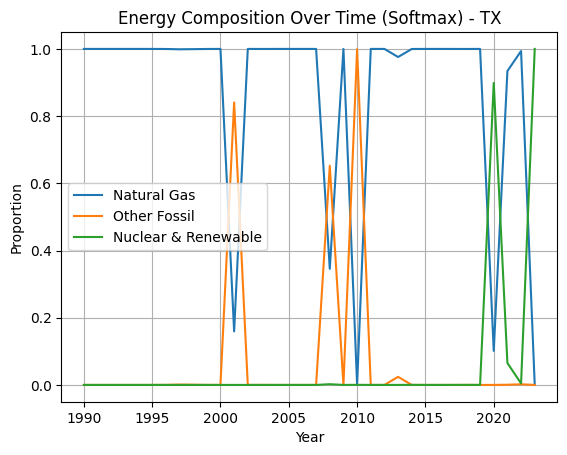

In [114]:
def softmax(row):
    e_x = np.exp(row - np.max(row))
    return e_x / e_x.sum()

softmax_df = df_pivot.copy()
softmax_df[['NG_soft', 'OF_soft', 'NR_soft']] = softmax_df[['Natural Gas', 'Other Fossil', 'Nuclear and Renewable']].apply(softmax, axis=1)

state_plot = 'TX'
state_soft = softmax_df[softmax_df['state'] == state_plot]

plt.plot(state_soft['year'], state_soft['NG_soft'], label='Natural Gas')
plt.plot(state_soft['year'], state_soft['OF_soft'], label='Other Fossil')
plt.plot(state_soft['year'], state_soft['NR_soft'], label='Nuclear & Renewable')
plt.title(f"Energy Composition Over Time (Softmax) - {state_plot}")
plt.xlabel("Year")
plt.ylabel("Proportion")
plt.legend()
plt.grid(True)
plt.show()

In [115]:
df_pivot = df_pivot.fillna(0)

In [116]:
vectorized_data = df_pivot.pivot(index='year', columns='state', values=['Natural Gas', 'Other Fossil', 'Nuclear and Renewable'])

In [117]:
vectorized_data.columns = [f"{energy}_{state}" for energy, state in vectorized_data.columns]

In [118]:
vectorized_data = vectorized_data.reset_index()

In [119]:
from sklearn.linear_model import LinearRegression

data = vectorized_data.dropna()
X = data[['year']]
Y = data.drop(columns=['year'])

model = LinearRegression()
model.fit(X, Y)

print("Regression coefficients shape:", model.coef_.shape)

Regression coefficients shape: (153, 1)


In [120]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred = model.predict(X)

print("R2 score:", r2_score(Y, Y_pred))
print("RMSE:", np.sqrt(mean_squared_error(Y, Y_pred)))

R2 score: 0.43358096589136785
RMSE: 10.29975914974307


In [121]:
vectorized_data.head()

,year,Natural Gas_AK,Natural Gas_AL,Natural Gas_AR,Natural Gas_AZ,Natural Gas_CA,Natural Gas_CO,Natural Gas_CT,Natural Gas_DC,Natural Gas_DE,...,Nuclear and Renewable_SD,Nuclear and Renewable_TN,Nuclear and Renewable_TX,Nuclear and Renewable_UT,Nuclear and Renewable_VA,Nuclear and Renewable_VT,Nuclear and Renewable_WA,Nuclear and Renewable_WI,Nuclear and Renewable_WV,Nuclear and Renewable_WY
0,1990,14.461423,-1.905304,3.893868,-2.972898,21.868309,17.058913,10.776601,0.0,-1.858406,...,6.201658,29.295917,-19.041588,15.776547,15.060479,39.037003,58.646761,-2.288165,2.406067,1.635762
1,1991,14.907956,-2.539543,4.095778,0.755169,16.808862,17.489902,16.290858,0.0,11.822255,...,6.253369,30.433234,-18.459541,15.366311,10.258236,37.503598,55.767945,-8.917738,8.574666,0.649839
2,1992,14.708093,-2.262083,6.691179,-2.573890,23.168229,12.506317,13.511794,0.0,-2.119711,...,7.567368,29.001131,-17.060812,20.865520,12.571353,41.739767,45.911079,30.190641,6.303022,-2.660690
3,1993,15.013463,-5.517440,12.117175,-2.940427,16.642190,20.971450,15.659051,0.0,-1.719190,...,5.418956,24.921878,-19.091252,19.582806,6.423339,42.819921,41.785148,28.019655,5.044376,9.595481
4,1994,14.640810,-5.018317,14.061611,-4.118758,18.239651,18.858220,7.882221,0.0,-0.362881,...,6.257196,28.267656,-17.987545,19.635451,8.855353,43.632992,35.545036,24.989673,4.438859,0.483701


In [122]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import warnings
warnings.filterwarnings("ignore")

state_wise_series = {}

for state in df['state'].unique():
    state_df = df_pivot[df_pivot['state'] == state].sort_values(by='year')
    state_df = state_df[['year', 'Natural Gas', 'Other Fossil', 'Nuclear and Renewable']].set_index('year')
    state_wise_series[state] = state_df

var_results = {}
order_selection_results = {}

for state, series in state_wise_series.items():
    try:
        series = series.dropna()

        if any(series.nunique() <= 1):
            print(f"Skipping {state}: One or more series is constant.")
            continue

        if not all(series.apply(lambda x: adfuller(x)[1] < 0.05)):
            series = series.diff().dropna()

        model = VAR(series)
        lag_selection = model.select_order(maxlags=5)

        order_selection_results[state] = {
            'AIC': lag_selection.aic,
            'BIC': lag_selection.bic,
            'HQIC': lag_selection.hqic,
            'Selected_Lag_AIC': lag_selection.selected_orders['aic'],
            'Selected_Lag_BIC': lag_selection.selected_orders['bic'],
            'Selected_Lag_HQIC': lag_selection.selected_orders['hqic']
        }

        selected_lag = lag_selection.selected_orders['aic']
        results = model.fit(selected_lag)

        if np.all(np.linalg.eigvals(results.sigma_u) > 0):
            var_results[state] = results
        else:
            print(f"Skipping {state}: Covariance matrix not positive definite.")

    except Exception as e:
        print(f"VAR model failed for {state}: {e}")

Skipping HI: One or more series is constant.


In [123]:
lag_comparison_df = pd.DataFrame.from_dict(order_selection_results, orient='index')
lag_comparison_df.index.name = 'State'

lag_comparison_df = lag_comparison_df[['Selected_Lag_AIC', 'Selected_Lag_BIC', 'Selected_Lag_HQIC']]

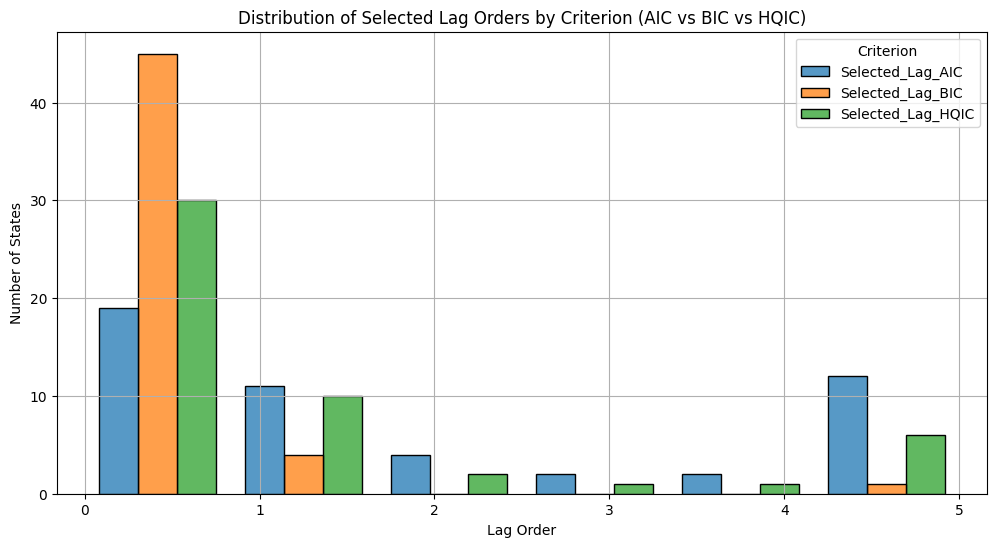

In [124]:
plt.figure(figsize=(12, 6))
sns.histplot(lag_comparison_df.melt(var_name='Criterion', value_name='Lag'),
             x='Lag', hue='Criterion', multiple='dodge', shrink=0.8, bins=6)
plt.title("Distribution of Selected Lag Orders by Criterion (AIC vs BIC vs HQIC)")
plt.xlabel("Lag Order")
plt.ylabel("Number of States")
plt.grid(True)
plt.show()

In [125]:
lag_comparison_df['AIC_vs_BIC'] = lag_comparison_df['Selected_Lag_AIC'] == lag_comparison_df['Selected_Lag_BIC']
lag_comparison_df['AIC_vs_HQIC'] = lag_comparison_df['Selected_Lag_AIC'] == lag_comparison_df['Selected_Lag_HQIC']

print("AIC and BIC agree in:", lag_comparison_df['AIC_vs_BIC'].sum(), "states")
print("AIC and HQIC agree in:", lag_comparison_df['AIC_vs_HQIC'].sum(), "states")

AIC and BIC agree in: 22 states
AIC and HQIC agree in: 35 states


In [126]:
aic_bic_diff = lag_comparison_df[lag_comparison_df['AIC_vs_BIC'] == False].index.tolist()
aic_hqic_diff = lag_comparison_df[lag_comparison_df['AIC_vs_HQIC'] == False].index.tolist()

print("AIC and BIC differ in:", aic_bic_diff)
print("AIC and HQIC differ in:", aic_hqic_diff)

AIC and BIC differ in: ['AL', 'AR', 'AZ', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KY', 'MD', 'ME', 'MI', 'MS', 'NH', 'NJ', 'NM', 'OH', 'OR', 'PA', 'SC', 'SD', 'TX', 'UT', 'WA', 'WI', 'WY']
AIC and HQIC differ in: ['DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'MD', 'NH', 'NJ', 'SC', 'SD', 'UT', 'WA', 'WI', 'WY']


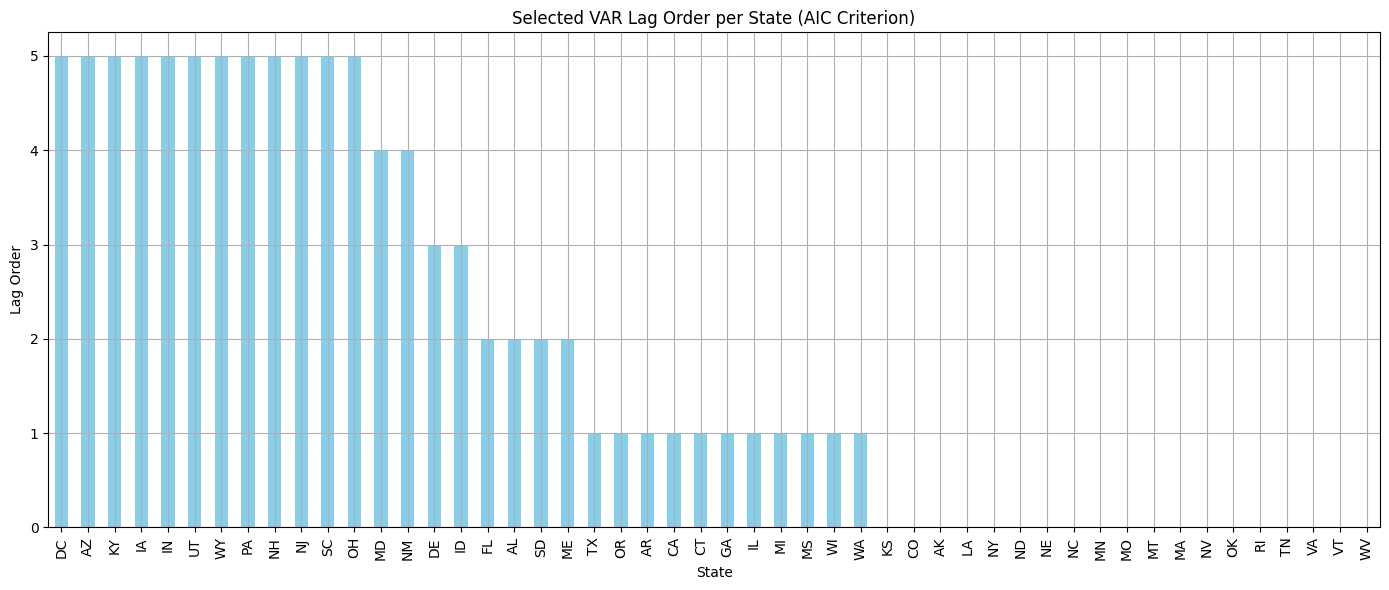

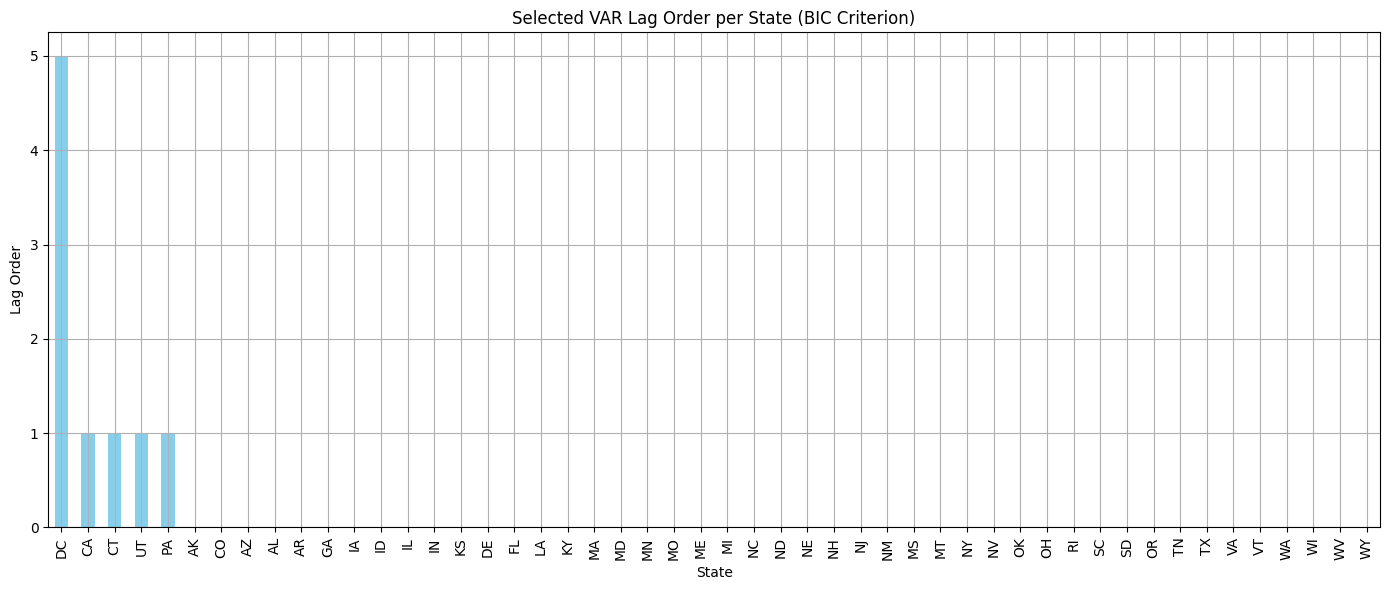

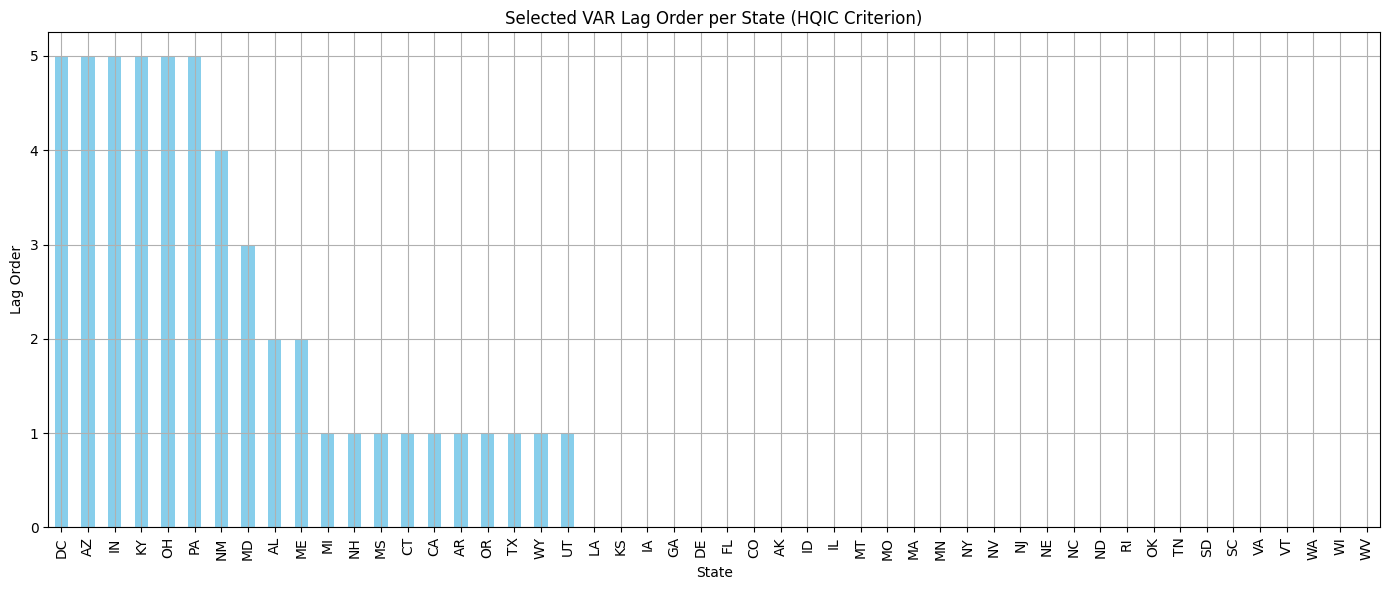

In [127]:
plt.figure(figsize=(14, 6))
lag_comparison_df['Selected_Lag_AIC'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Selected VAR Lag Order per State (AIC Criterion)")
plt.ylabel("Lag Order")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))
lag_comparison_df['Selected_Lag_BIC'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Selected VAR Lag Order per State (BIC Criterion)")
plt.ylabel("Lag Order")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
lag_comparison_df['Selected_Lag_HQIC'].sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title("Selected VAR Lag Order per State (HQIC Criterion)")
plt.ylabel("Lag Order")
plt.xlabel("State")
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()

In [128]:
var_results.keys()

dict_keys(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY'])

In [129]:
model_stats = []

for state, model in var_results.items():
    try:
        stats = {
            'state': state,
            'AIC': model.aic,
            'BIC': model.bic,
            'NumObs': model.nobs
        }
        model_stats.append(stats)
    except Exception as e:
        print(f"Failed to extract stats for {state}: {e}")

model_stats_df = pd.DataFrame(model_stats)
model_stats_df.sort_values(by='AIC').head()

,state,AIC,BIC,NumObs
49,WY,6.693142,8.976922,28
16,KY,7.189043,9.472822,28
7,DC,7.281477,9.565256,28
37,PA,7.534596,9.818375,28
33,NY,8.672134,8.808180,33


In [130]:
model_stats_df.head()

,state,AIC,BIC,NumObs
0,AK,9.779990,9.916037,33
1,AL,9.884472,10.855883,31
2,AR,9.627002,10.176653,32
3,AZ,10.108449,12.392228,28
4,CA,9.864771,10.414422,32


In [131]:
print(var_results['NV'].summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 17, Nov, 2025
Time:                     07:27:06
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    10.1003
Nobs:                     33.0000    HQIC:                   10.0101
Log likelihood:          -301.886    FPE:                    21255.0
AIC:                      9.96429    Det(Omega_mle):         19434.2
--------------------------------------------------------------------
Results for equation Natural Gas
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const         0.833063         0.844846            0.986           0.324

Results for equation Other Fossil
           coefficient       std. error           t-stat            prob
---------------------------------------------------

In [132]:
print(var_results['NH'].summary())

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 17, Nov, 2025
Time:                     07:27:06
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    14.1724
Nobs:                     29.0000    HQIC:                   12.6181
Log likelihood:          -248.132    FPE:                    225051.
AIC:                      11.9093    Det(Omega_mle):         60233.5
--------------------------------------------------------------------
Results for equation Natural Gas
                              coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------------------
const                            3.167257         3.900389            0.812           0.417
L1.Natural Gas                   0.491344         0.257356            1.909           0.056
L1.Other F

In [133]:
def clr_to_softmax(clr_values, clip_min=-10, clip_max=10):
    clipped = np.clip(clr_values, clip_min, clip_max)
    exp_vals = np.exp(clipped - np.max(clipped))
    return exp_vals / exp_vals.sum()

In [134]:
def forecast_next_step(state, var_results, df_pivot):
    model = var_results[state]
    lags = model.k_ar

    recent_data = df_pivot[df_pivot['state'] == state].sort_values('year')
    series = recent_data[['Natural Gas', 'Other Fossil', 'Nuclear and Renewable']].dropna()

    if len(series) < lags:
        return None

    last_obs = series.values[-lags:]
    mu = series.mean().values
    centered = last_obs - mu
    centered = centered[::-1]

    A = model.coefs

    forecast = mu.copy()
    for i in range(lags):
        forecast += A[i] @ centered[i]

    return forecast

In [135]:
forecasts_softmax = {}

for state in var_results.keys():
    clr_forecast = forecast_next_step(state, var_results, df_pivot)
    if clr_forecast is not None:
        softmax_values = clr_to_softmax(clr_forecast)
        forecasts_softmax[state] = softmax_values

forecast_df = pd.DataFrame.from_dict(forecasts_softmax, orient='index',
                                     columns=['Natural Gas', 'Other Fossil', 'Nuclear & Renewable'])

In [136]:
forecast_df.index.name = 'State'

In [137]:
forecast_df_pct = forecast_df * 100

In [138]:
forecast_df_pct

,Natural Gas,Other Fossil,Nuclear & Renewable
State,,,
AK,3.333333e+01,3.333333e+01,3.333333e+01
AL,3.184448e-04,2.061147e-07,9.999968e+01
AR,3.884257e+01,2.231485e+01,3.884257e+01
AZ,3.333333e+01,3.333333e+01,3.333333e+01
CA,3.333333e+01,3.333333e+01,3.333333e+01
CO,3.333333e+01,3.333333e+01,3.333333e+01
CT,4.968954e+01,6.209159e-01,4.968954e+01
DC,3.537434e-05,5.180996e+00,9.481897e+01
DE,8.115169e-03,9.999188e+01,2.060986e-07


In [139]:
forecast_df_pct = forecast_df_pct.round(3)
forecast_df_pct.columns = ['Natural Gas (%)', 'Other Fossil (%)', 'Nuclear & Renewable (%)']

In [140]:
forecast_df_pct

,Natural Gas (%),Other Fossil (%),Nuclear & Renewable (%)
State,,,
AK,33.333,33.333,33.333
AL,0.000,0.000,100.000
AR,38.843,22.315,38.843
AZ,33.333,33.333,33.333
CA,33.333,33.333,33.333
CO,33.333,33.333,33.333
CT,49.690,0.621,49.690
DC,0.000,5.181,94.819
DE,0.008,99.992,0.000


In [141]:
# Actual 2023 percentages
actual_2023_pct = df_pivot[df_pivot['year'] == 2023].set_index('state')[
    ['Natural Gas', 'Other Fossil', 'Nuclear and Renewable']
]

In [142]:
# Rename forecast_df_pct to match actual column names
forecast_df_pct.columns = ['Natural Gas', 'Other Fossil', 'Nuclear and Renewable']

# Ensure index is state
forecast_df_pct.index.name = 'state'

# Align common states only
common_states = forecast_df_pct.index.intersection(actual_2023_pct.index)

forecast_aligned = forecast_df_pct.loc[common_states]
actual_aligned = actual_2023_pct.loc[common_states]

In [143]:
from sklearn.metrics import mean_absolute_error

mae_clr = (forecast_aligned - actual_aligned).abs().mean()
print("MAE (CLR-based Forecast):")
print(mae_clr)

MAE (CLR-based Forecast):
Natural Gas              19.349581
Other Fossil             21.851894
Nuclear and Renewable    41.991730
dtype: float64


In [144]:
baseline_2022 = df_pivot[df_pivot['year'] == 2022].set_index('state')[
    ['Natural Gas', 'Other Fossil', 'Nuclear and Renewable']
].loc[common_states]

mae_baseline = (baseline_2022 - actual_aligned).abs().mean()
print("MAE (Baseline Forecast):")
print(mae_baseline)

MAE (Baseline Forecast):
energy_category
Natural Gas              3.212061
Other Fossil             4.851741
Nuclear and Renewable    9.768257
dtype: float64


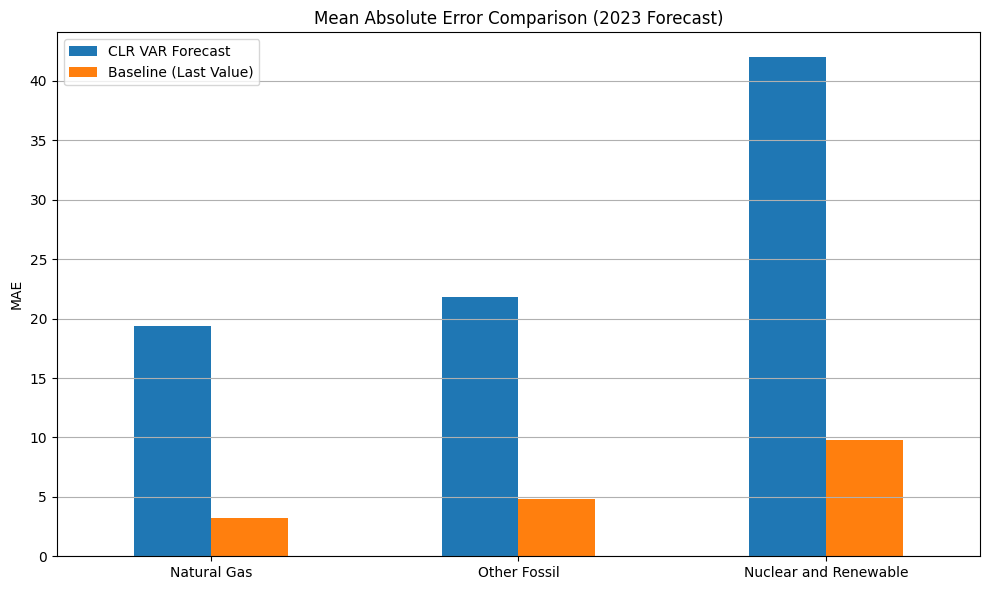

In [145]:
import matplotlib.pyplot as plt
import pandas as pd

comparison_df = pd.DataFrame({
    'CLR VAR Forecast': mae_clr,
    'Baseline (Last Value)': mae_baseline
})

comparison_df.plot(kind='bar', figsize=(10, 6))
plt.title("Mean Absolute Error Comparison (2023 Forecast)")
plt.ylabel("MAE")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()